# ElasticNet with Normalize


**This Code template is for Regression tasks using a ElasticNet based on the Regression linear model Technique and feature rescaling technique Normalize** 

### Required Packages

In [1]:
import warnings as wr
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
wr.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [2]:
#filepath
file_path= ""

List of features which are  required for model training .

In [3]:
#x_values
features=[]

Target feature for prediction.

In [4]:
#y_value
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [5]:
df=pd.read_csv(file_path) #reading file
df.head()#displaying initial entries

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4.0,4.5,4.5,9.65,1,0.92
1,2,324,107,4.0,4.0,4.5,8.87,1,0.76
2,3,316,104,3.0,3.0,3.5,8.00,1,0.72
3,4,322,110,3.0,3.5,2.5,8.67,1,0.80
4,5,314,103,2.0,2.0,3.0,8.21,0,0.65


In [6]:
print('Number of rows are :',df.shape[0], ',and number of columns are :',df.shape[1])

Number of rows are : 400 ,and number of columns are : 9


In [7]:
df.columns.tolist()


['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [8]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)
def EncodeY(df):
    if len(df.unique())<=2:
        return df
    else:
        un_EncodedT=np.sort(pd.unique(df), axis=-1, kind='mergesort')
        df=LabelEncoder().fit_transform(df)
        EncodedT=[xi for xi in range(len(un_EncodedT))]
        print("Encoded Target: {} to {}".format(un_EncodedT,EncodedT))
        return df

#### Data Distribution 

**PairPlot** Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column

<Figure size 1440x1440 with 0 Axes>

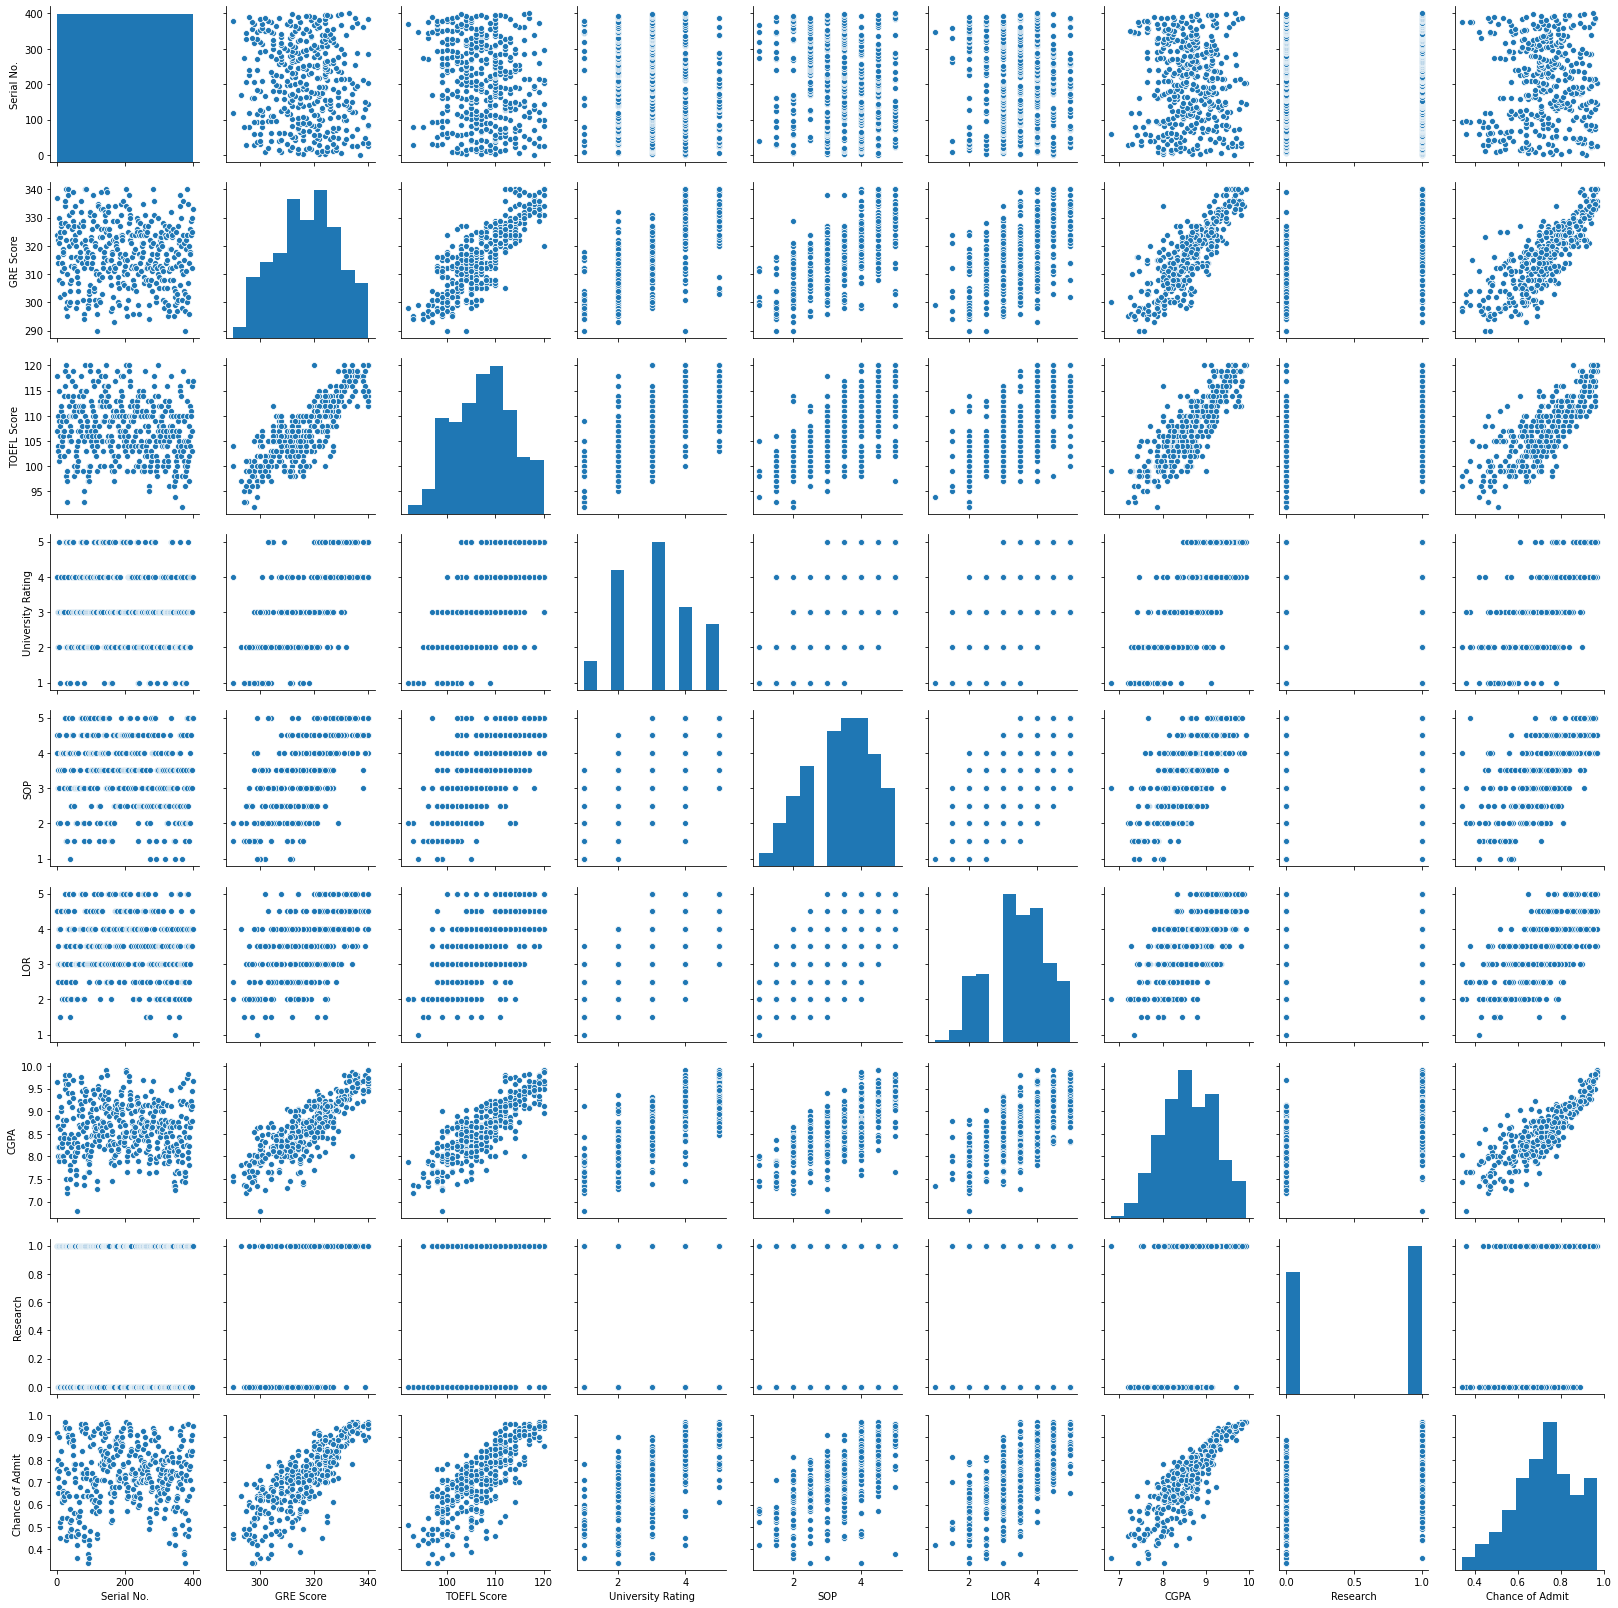

In [9]:
plt.figure(figsize = (20, 20))
sns.pairplot(df)
plt.show()

#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

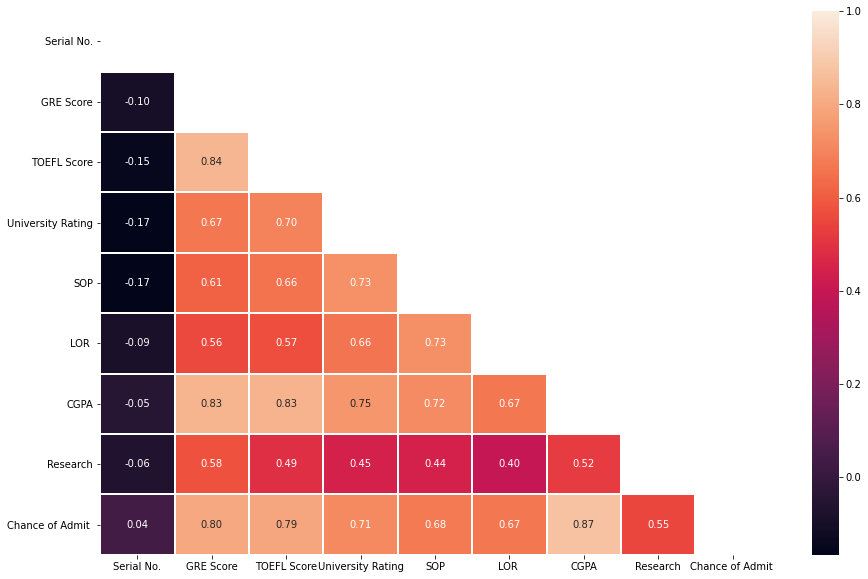

In [10]:
plt.figure(figsize = (15, 10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [11]:
#Elminiating features that are irrlevant

df.drop(["Serial No."],axis=1,inplace = True)

In [12]:
#spliting data into X(features) and Y(Target)

X=df.[features]
Y=df[Target]  

In [13]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])  
X=EncodeX(X)
Y=EncodeY(NullClearner(Y))
X.head()

Encoded Target: [0.34 0.36 0.38 0.39 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51
 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65
 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79
 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93
 0.94 0.95 0.96 0.97] to [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4.0,4.5,4.5,9.65,1
1,324,107,4.0,4.0,4.5,8.87,1
2,316,104,3.0,3.0,3.5,8.00,1
3,322,110,3.0,3.5,2.5,8.67,1
4,314,103,2.0,2.0,3.0,8.21,0


### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [14]:
#we can choose randomstate and test_size as over requerment
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123) #performing datasplitting

# Data Scaling
### Normalizer

* Normalizer normalizes samples (rows) individually to unit norm.
* Each sample with at least one non zero component is rescaled independently of other samples so that its norm (l1, l2 or inf) equals one.
* We will fit an object of Normalizer to train data then transform the same data via fit_transform(X_train) method, following which we will transform test data via transform(X_test) method.

In [1]:
scaler=Normalizer() #making a object of Normalizer
X_train=scaler.fit_transform(X_train) #fiting the data on the training set
X_test=scaler.transform(X_test) #scaling testing set

* *Now over data is scaled, let's trained the moder*

## Model

### ElasticNet

Elastic Net first emerged as a result of critique on Lasso, whose variable selection can be too dependent on data and thus unstable. The solution is to combine the penalties of Ridge regression and Lasso to get the best of both worlds.

**Features of ElasticNet Regression-**
* It combines the L1 and L2 approaches.
* It performs a more efficient regularization process.
* It has two parameters to be set, λ and α.

 #### Model Tuning Parameters
alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=50, selection='cyclic', tol=0.0001, warm_start=False
           

   1 alpha : float, default=1.0





    1. alpha : float, default=1.0
    
> Constant that multiplies the penalty terms. Defaults to 1.0. See the notes for the exact mathematical meaning of this parameter. alpha = 0 is equivalent to an ordinary least square, solved by the LinearRegression object. For numerical reasons, using alpha = 0 with the Lasso object is not advised. Given this, you should use the LinearRegression object.


    2. l1_ratio : float, default=0.5
> The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.

    3. normalize : bool, default=False
>This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False.

    4. precompute : bool or array-like of shape (n_features, n_features), default=False
>Whether to use a precomputed Gram matrix to speed up calculations. The Gram matrix can also be passed as argument. For sparse input this option is always False to preserve sparsity.

    5. max_iter : int, default=1000
>The maximum number of iterations.

    6. copy_X : bool, default=True
>If True, X will be copied; else, it may be overwritten.

    7. tol : float, default=1e-4
>The tolerance for the optimization: if the updates are smaller than tol, the optimization code checks the dual gap for optimality and continues until it is smaller than tol.

    8. warm_start : bool, default=False
>When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. See the Glossary.

    9. positive : bool, default=False
>When set to True, forces the coefficients to be positive.

    10. random_state : int, RandomState instance, default=None
>The seed of the pseudo random number generator that selects a random feature to update. Used when selection == ‘random’. Pass an int for reproducible output across multiple function calls. See Glossary.

    11. selection : {‘cyclic’, ‘random’}, default=’cyclic’
>If set to ‘random’, a random coefficient is updated every iteration rather than looping over features sequentially by default. This (setting to ‘random’) often leads to significantly faster convergence especially when tol is higher than 1e-4.

### Attributes :

    1. coef_ : ndarray of shape (n_features,) or (n_targets, n_features)
>Parameter vector (w in the cost function formula).

    2. sparse_coef_ : sparse matrix of shape (n_features,) or (n_tasks, n_features)
>Sparse representation of the fitted coef_.

    3. intercept_ : float or ndarray of shape (n_targets,)
>Independent term in decision function.

    4. n_iter_ : list of int
>Number of iterations run by the coordinate descent solver to reach the specified tolerance.

    5. dual_gap_ : float or ndarray of shape (n_targets,)
>Given param alpha, the dual gaps at the end of the optimization, same shape as each observation of y.

In [15]:
#training the GradientBoostingClassifier
model = ElasticNet(random_state = 50)
model.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=50, selection='cyclic', tol=0.0001, warm_start=False)

#### Model Accuracy
score() method return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [16]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 70.01 %



In [17]:
#prediction on testing set
prediction=model.predict(X_test)

### Model evolution

**Mean Squared Error** is utilized to understand the performance of the Regression model or algorithm in machine learning for a given test set where results are known.

In [18]:
print('Mean Absolute Error:', mean_absolute_error(y_test, prediction))  
print('Mean Squared Error:', mean_squared_error(y_test, prediction))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, prediction)))

Mean Absolute Error: 5.318554448635578
Mean Squared Error: 57.37526872823331
Root Mean Squared Error: 7.574646442457451


R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that’s explained by an independent variable or variables in a regression model.

In [19]:
print("R-squared score : ",r2_score(y_test,prediction))

R-squared score :  0.7000865596931185


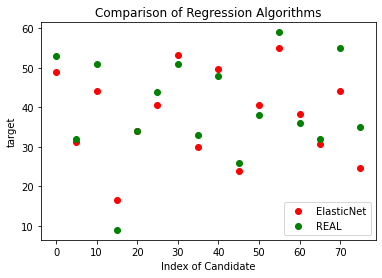

In [21]:
#ploting actual and predicted
red = plt.scatter(np.arange(0,80,5),prediction[0:80:5],color = "red")
green = plt.scatter(np.arange(0,80,5),y_test[0:80:5],color = "green")
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Index of Candidate")
plt.ylabel("target")
plt.legend((red,green),('ElasticNet', 'REAL'))
plt.show()


#### Creator: Vipin Kumar , Github: [Profile](https://github.com/devVipin01)